In [1]:
import requests
import os
import time
import threading
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO


def download_page(url):
   '''
   用于下载页面
   '''
   headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:61.0) Gecko/20100101 Firefox/61.0"}
   r = requests.get(url, headers=headers)
   r.encoding = 'gb2312'
   return r.text


def get_pic_list(html):
   '''
   获取每个页面的套图列表,之后循环调用get_pic函数获取图片
   '''
   soup = BeautifulSoup(html, 'html.parser')
   pic_list = soup.find_all('li', class_='wp-item')
   for i in pic_list:
       a_tag = i.find('h3', class_='tit').find('a')
       link = a_tag.get('href')
       text = a_tag.get_text()
       get_pic(link, text)


def get_pic(link, text):
   '''
   获取当前页面的图片,并保存
   '''
   html = download_page(link)  # 下载界面
   soup = BeautifulSoup(html, 'html.parser')
   pic_list = soup.find('div', id="picture").find_all('img')  # 找到界面所有图片
   headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:61.0) Gecko/20100101 Firefox/61.0"}
   create_dir('pic/{}'.format(text))
   for i in pic_list:
       pic_link = i.get('src')  # 拿到图片的具体 url
       r = requests.get(pic_link, headers=headers)  # 下载图片，之后保存到文件
       with open('pic/{}/{}'.format(text, link.split('/')[-1]), 'wb') as f:
           f.write(r.content)
           time.sleep(1)   # 休息一下，不要给网站太大压力，避免被封


def create_dir(name):
   if not os.path.exists(name):
       os.makedirs(name)


def execute(url):
   page_html = download_page(url)
   get_pic_list(page_html)


def main():
   create_dir('pic');
   queue = [i for i in range(1, 72)]   # 构造 url 链接 页码。
   threads = []
   while len(queue) > 0:
       for thread in threads:
           if not thread.is_alive():
               threads.remove(thread)
       while len(threads) < 5 and len(queue) > 0:   # 最大线程数设置为 5
           cur_page = queue.pop(0)
           url = 'http://www.bjp.org.cn/art/2019/4/30/art_249_2688.html'.format(cur_page)
           thread = threading.Thread(target=execute, args=(url,))
           thread.setDaemon(True)
           thread.start()
           print('{}正在下载{}页'.format(threading.current_thread().name, cur_page))
           threads.append(thread)


if __name__ == '__main__':
   main()

MainThread正在下载1页
MainThread正在下载2页
MainThread正在下载3页
MainThread正在下载4页
MainThread正在下载5页
MainThread正在下载6页
MainThread正在下载7页
MainThread正在下载8页
MainThread正在下载9页
MainThread正在下载10页
MainThread正在下载11页
MainThread正在下载12页
MainThread正在下载13页
MainThread正在下载14页
MainThread正在下载15页
MainThread正在下载16页
MainThread正在下载17页
MainThread正在下载18页
MainThread正在下载19页
MainThread正在下载20页
MainThread正在下载21页
MainThread正在下载22页
MainThread正在下载23页
MainThread正在下载24页
MainThread正在下载25页
MainThread正在下载26页
MainThread正在下载27页
MainThread正在下载28页
MainThread正在下载29页
MainThread正在下载30页
MainThread正在下载31页
MainThread正在下载32页
MainThread正在下载33页
MainThread正在下载34页
MainThread正在下载35页
MainThread正在下载36页
MainThread正在下载37页
MainThread正在下载38页
MainThread正在下载39页
MainThread正在下载40页
MainThread正在下载41页
MainThread正在下载42页
MainThread正在下载43页
MainThread正在下载44页
MainThread正在下载45页
MainThread正在下载46页
MainThread正在下载47页
MainThread正在下载48页
MainThread正在下载49页
MainThread正在下载50页
MainThread正在下载51页
MainThread正在下载52页
MainThread正在下载53页
MainThread正在下载54页
MainThread正在下载55页
MainThread正在下载56页
M

In [2]:
# N- 10000
# s=0
# imoport numpy as np 
# imprt random as R 
# for icN:
#     x-y=R.random

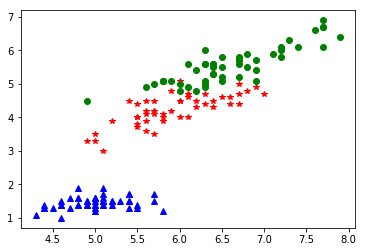

/home/ap_tech/miniconda3/envs/west/lib/python2.7/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


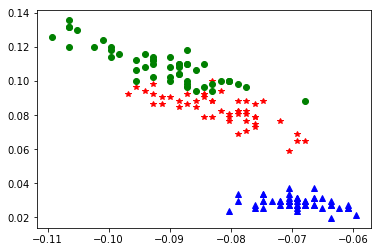

[[-71.27620632   0.           0.           0.        ]
 [  0.           0.          49.82036993   0.        ]
 [  0.         -36.82062929   0.           0.        ]
 [  0.           0.           0.          16.38763929]]


In [4]:
from sklearn import datasets
iris=datasets.load_iris() # 从数据库获得数据
data=iris.data #获得自变量数据
target=iris.target  # 获得样本的分类信息
from pylab import plot, show
plot(data[target==0,0],data[target==0,2],'b^')
plot(data[target==1,0],data[target==1,2],'r*')
plot(data[target==2,0],data[target==2,2],'go')
show()
from sklearn.decomposition import SparsePCA
pca = SparsePCA(n_components=4)
pcad = pca.fit_transform(data)
plot(pcad[target==0,0],pcad[target==0,1],'b^')
plot(pcad[target==1,0],pcad[target==1,1],'r*')
plot(pcad[target==2,0],pcad[target==2,1],'go')
show()
print(pca.components_)
